# Check `binwidth`

In [1]:
library(ggplot2)

## Identity Stat

In [2]:
df <- data.frame(
    x = c(100, 140),
    y = c(2, 1),
    xmin = c(70, 130),
    xmax = c(130, 150)
)

Warning message in geom_histogram(stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


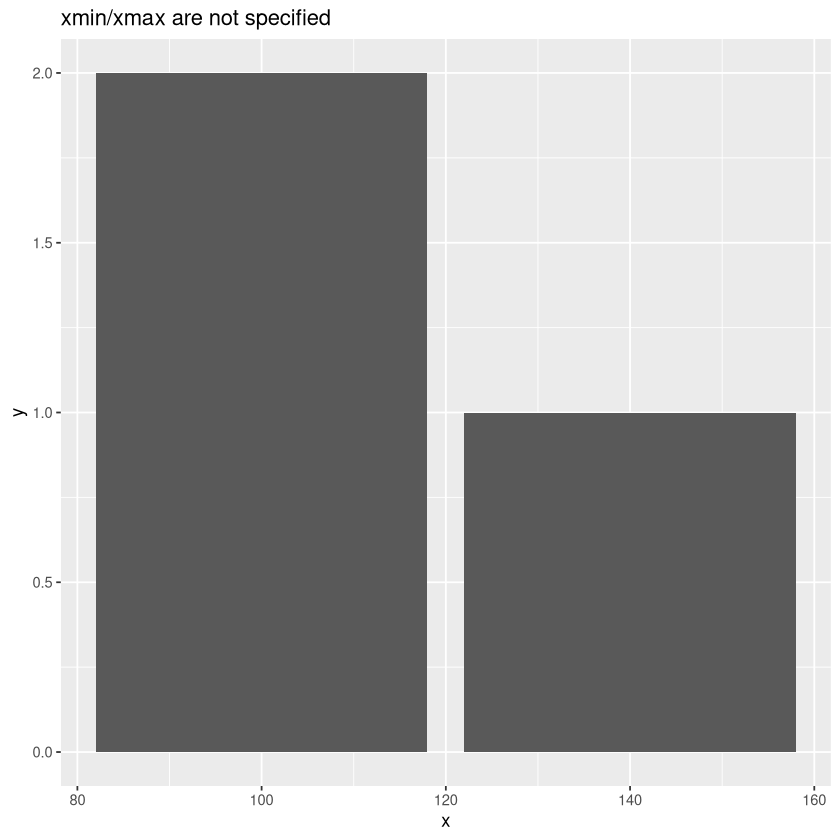

In [3]:
ggplot(df, aes(x, y)) + geom_histogram(stat = 'identity') + ggtitle("xmin/xmax are not specified")

Warning message in geom_histogram(aes(xmin = xmin, xmax = xmax), stat = "identity"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”
Warning message in geom_histogram(aes(xmin = xmin, xmax = xmax), stat = "identity"):
“Ignoring unknown aesthetics: xmin and xmax”


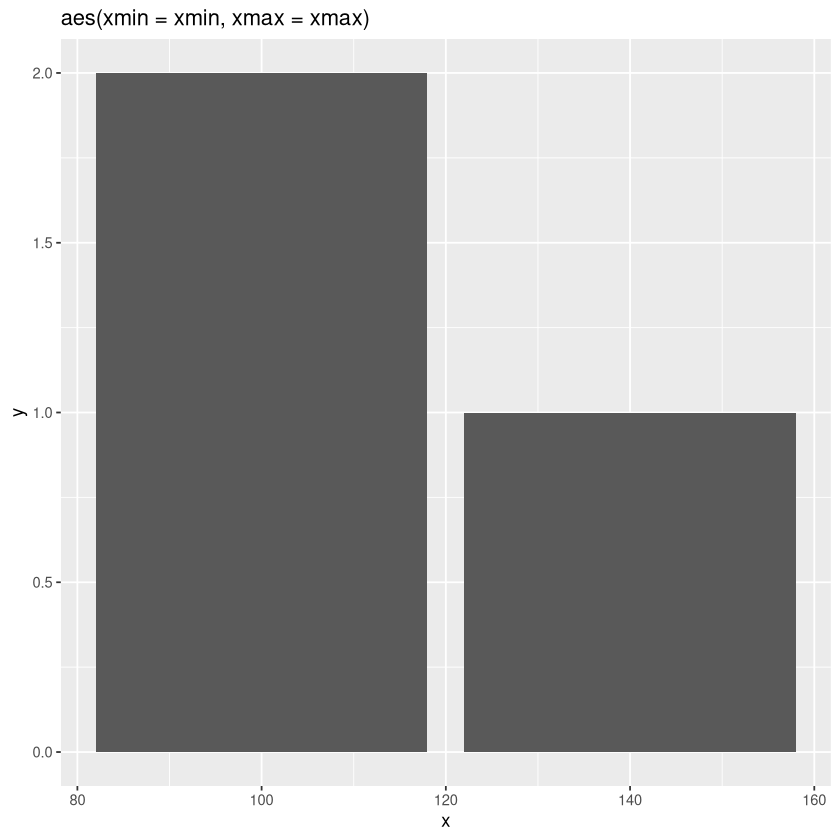

In [4]:
ggplot(df, aes(x, y)) + geom_histogram(aes(xmin = xmin, xmax = xmax), stat = 'identity') + ggtitle("aes(xmin = xmin, xmax = xmax)")

## One Bin

In [5]:
get_one_bin_plot <- function (binwidth=NULL, center=NULL, boundary=NULL) {
    df <- data.frame(x = c(5, 5, 5))
    ggplot(df, aes(x = x)) +
        geom_histogram(binwidth = binwidth, center = center, boundary = boundary)
}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


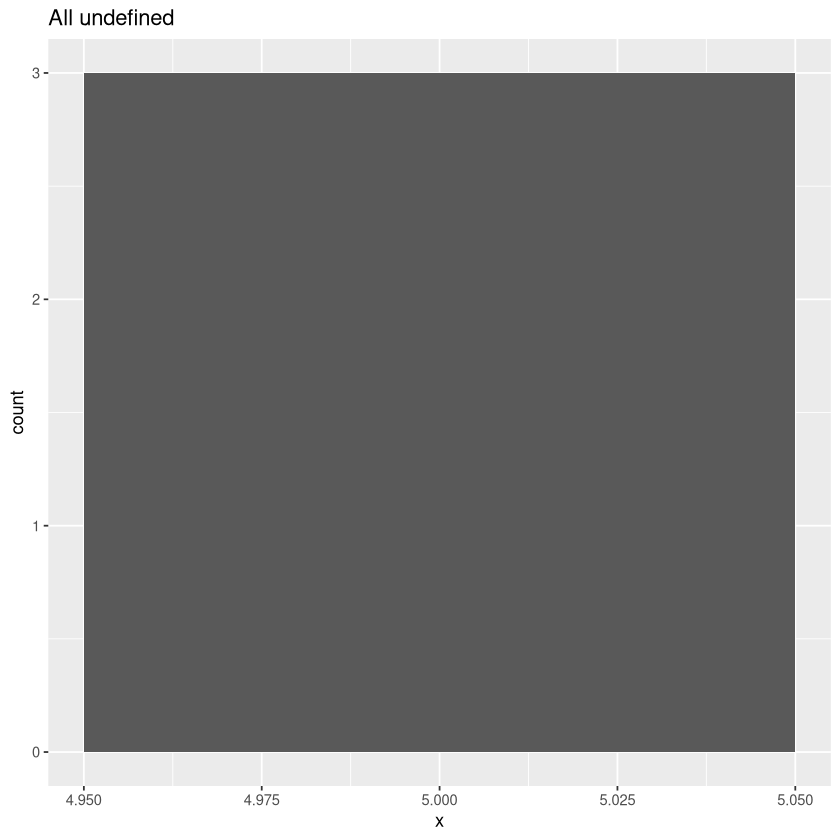

In [6]:
get_one_bin_plot() + ggtitle("All undefined")

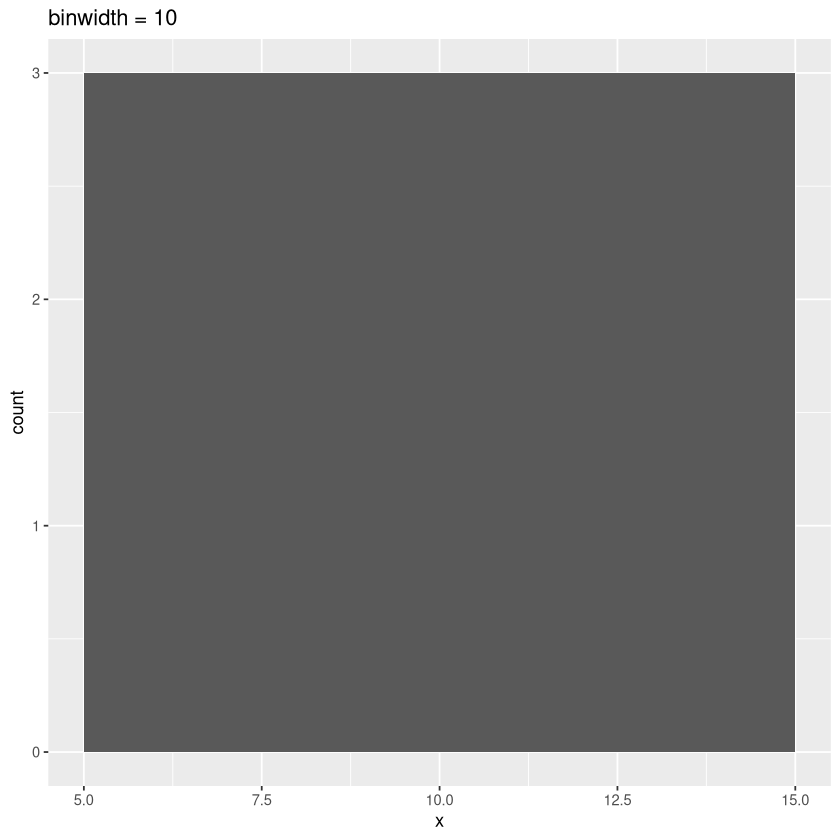

In [7]:
get_one_bin_plot(binwidth = 10) + ggtitle("binwidth = 10")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


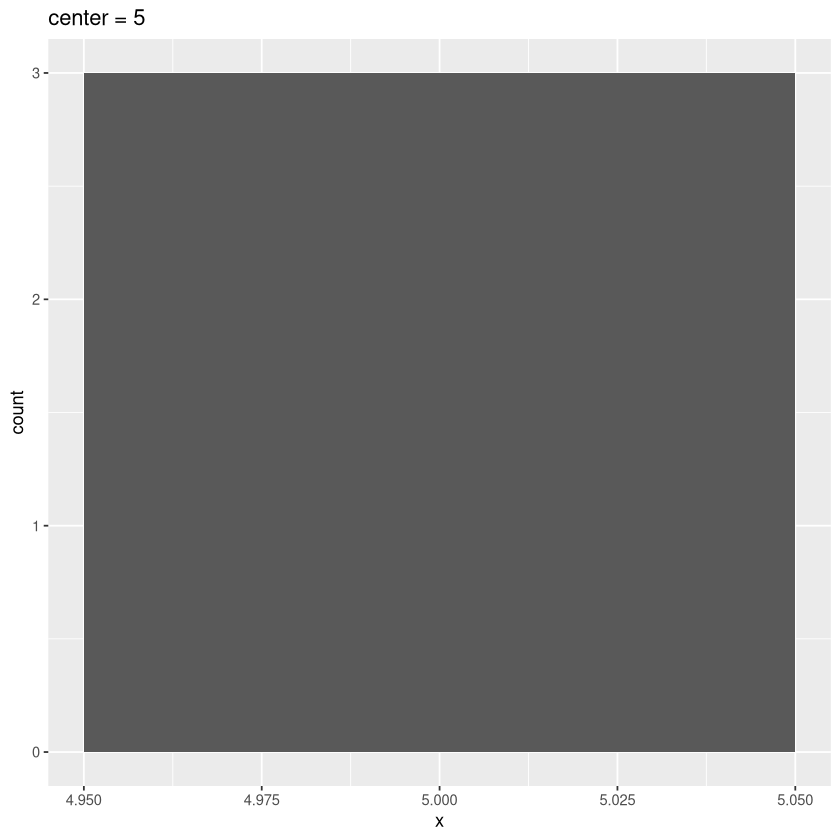

In [8]:
get_one_bin_plot(center = 5) + ggtitle("center = 5")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


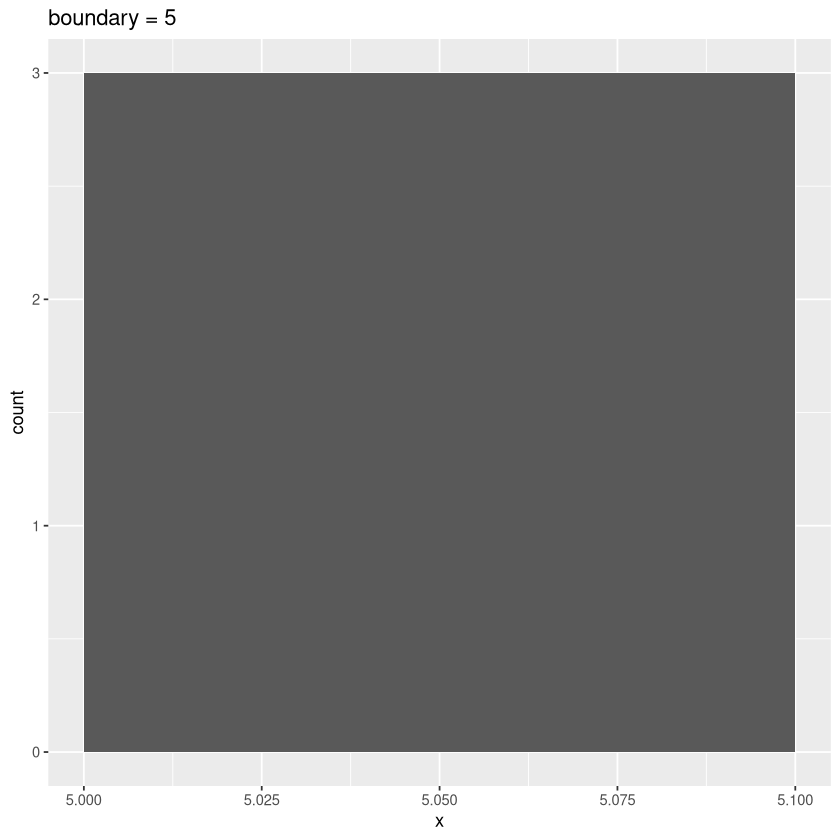

In [9]:
get_one_bin_plot(boundary = 5) + ggtitle("boundary = 5")

## Conflicting `binwidth` and `breaks`

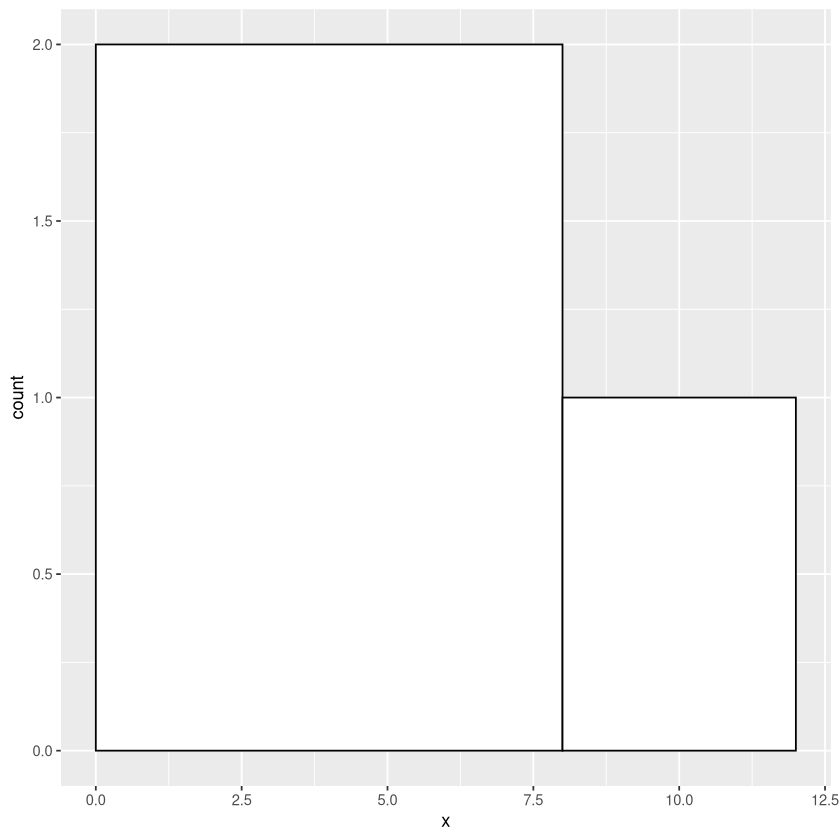

In [10]:
breaks = c(0, 8, 12)
df = data.frame(
    x = c(2, 6, 10)
)

ggplot(df, aes(x = x)) +
    geom_histogram(color = "black", fill = "white",
                   breaks = breaks,  # defined breaks -> calculates binwidths=[8, 4] for stat
                   binwidth = 2)     # defined binwidth -> use const binwidth=2 in geom